### 1. Introduction

Transport is the pulse that connects the daily life and work of a city's inhabitants. In the context of rapid urbanization, the rapid growth of urban population has brought a series of challenges to the daily management of cities, such as road traffic congestion and environmental pollution. Faced with the problem of sustainable development, the analysis of residents' travel activities and travel people's hotspot areas has also become one of the more active research areas. As an important part of the city, urban residents' travel activities directly influence the distribution of urban traffic flows. Therefore, the analysis of residents' travel patterns is of great significance for urban transport planning.       
New York City (NYC) is one of the cities known for its visible taxi traffic and yellow taxis have become one of the city's icons. There are over 13,000 licensed yellow taxis in New York City. According to a recent survey, they transport an average of 660,000 people every day and the taxi traffic in NYC exceeds that of many public transportation systems in the United States (Schaller Consulting, 2004). As taxis are an important part of New York City residents' trips, we were able to analyze taxi track data to discover the behavioral characteristics of residents' trips and study the popular areas of their trips. What’s more, one of the most fundamental questions for future smart cities is how to build an efficient transportation system (yinyong). To address this question, a critical component is an accurate demand prediction model. With the popularity of the use of Uber and Lyft software and the use of GPS, we can collect large-scale taxi usage data to predict the public's transport demand, and the prediction of demand allows for better allocation of resources in advance. This not only satisfies residents' need for fast and convenient travel, but also optimizes the allocation of transport resources.

### 2. Literature Review

## 3. Research question

## 4. Presentation of data

### 4.1 Read the Data 

**Data source：**

The data is divided into two parts, including the taxi data.parquet and the weather.csv.
The taxi data were collected and provided to the NYC Taxi and Limousine Commission (TLC).This dataset includes the capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts in 2023 Jan.       
Secondly，the dataset of weather is from the Visual Crossing. This dataset contains the hourly weather situation in the New York, including the temperature,windspeed,uvindex,icon,etc.

**Data Discription：**

Types of variables:

#### 4.1.1 the taxi data

In [1]:
import pandas as pd
import numpy as np
#Import plot package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import time series
from datetime import datetime
from sklearn.model_selection import train_test_split
import sys

In [2]:
df1 = pd.read_parquet('yellow_tripdata_2022-12.parquet')
df2 = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df = pd.concat([df1, df2], ignore_index=True)
df.info

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-12-01 00:37:35   2022-12-01 00:47:35              1.0   
1               1  2022-12-01 00:34:35   2022-12-01 00:55:21              0.0   
2               1  2022-12-01 00:33:26   2022-12-01 00:37:34              1.0   
3               1  2022-12-01 00:45:51   2022-12-01 00:53:16              1.0   
4               2  2022-12-01 00:49:49   2022-12-01 00:54:13              1.0   
...           ...                  ...                   ...              ...   
6466310         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
6466311         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
6466312         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
6466313         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
6466314         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN

In [3]:
select_columns = ['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance']
df_new = df[select_columns]

In [4]:
df_new_copy = df_new.copy()  # 先创建副本
df_new_copy['tpep_pickup_datetime'] = pd.to_datetime(df_new_copy['tpep_pickup_datetime'])
df_new_copy['tpep_dropoff_datetime'] = pd.to_datetime(df_new_copy['tpep_dropoff_datetime'])

In [5]:
# split 'tpep_pickup_datetime' to the 'datatime' and 'time' in order to merge with weather data 

df_new_copy['datetime'] = df_new_copy['tpep_pickup_datetime'].dt.date
df_new_copy['time'] = df_new_copy['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')

In [6]:
# Unified the datatime format

df_new_copy['datetime'] = df_new_copy['tpep_pickup_datetime'].dt.date.astype(str)
df_new_copy['datetime'] = df_new_copy['datetime'].str.replace('-01-', '-1-').str.replace('-0', '-')

In [7]:
df_new_copy.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,datetime,time
0,2022-12-01 00:37:35,2022-12-01 00:47:35,2.00,2022-12-1,00:37:35
1,2022-12-01 00:34:35,2022-12-01 00:55:21,8.40,2022-12-1,00:34:35
2,2022-12-01 00:33:26,2022-12-01 00:37:34,0.80,2022-12-1,00:33:26
3,2022-12-01 00:45:51,2022-12-01 00:53:16,3.00,2022-12-1,00:45:51
4,2022-12-01 00:49:49,2022-12-01 00:54:13,0.76,2022-12-1,00:49:49
5,2022-12-01 00:25:25,2022-12-01 00:35:38,2.60,2022-12-1,00:25:25
6,2022-12-01 00:05:37,2022-12-01 00:10:48,0.94,2022-12-1,00:05:37
7,2022-12-01 00:20:12,2022-12-01 00:28:49,2.09,2022-12-1,00:20:12
8,2022-12-01 00:00:54,2022-12-01 00:05:41,0.80,2022-12-1,00:00:54
9,2022-12-01 00:11:23,2022-12-01 00:30:00,7.62,2022-12-1,00:11:23


In [8]:
df_new_copy['hour'] = pd.to_datetime(df_new_copy['time']).dt.hour
#df_new['datetime'] = pd.to_datetime(df_new['datetime'])
#df_new['weekday'] = df_new['datetime'].apply(lambda x: x.weekday())
#df_new['duration'] = df_new['tpep_dropoff_datetime'] - df_new['tpep_pickup_datetime']
#df_new['duration'] = df_new['duration'].dt.total_seconds()

In [9]:
# 将日期和小时组合成新的一列
df_new_copy['datetime'] = pd.to_datetime(df_new_copy['datetime'])
df_new_copy['hour'] = pd.to_timedelta(df_new_copy['hour'], unit='H')
df_new_copy['datetime_hour'] = df_new_copy['datetime'] + df_new_copy['hour']

df_new_copy.head(154785)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,datetime,time,hour,datetime_hour
0,2022-12-01 00:37:35,2022-12-01 00:47:35,2.00,2022-12-01,00:37:35,0 days 00:00:00,2022-12-01 00:00:00
1,2022-12-01 00:34:35,2022-12-01 00:55:21,8.40,2022-12-01,00:34:35,0 days 00:00:00,2022-12-01 00:00:00
2,2022-12-01 00:33:26,2022-12-01 00:37:34,0.80,2022-12-01,00:33:26,0 days 00:00:00,2022-12-01 00:00:00
3,2022-12-01 00:45:51,2022-12-01 00:53:16,3.00,2022-12-01,00:45:51,0 days 00:00:00,2022-12-01 00:00:00
4,2022-12-01 00:49:49,2022-12-01 00:54:13,0.76,2022-12-01,00:49:49,0 days 00:00:00,2022-12-01 00:00:00
...,...,...,...,...,...,...,...
154780,2022-12-02 10:03:18,2022-12-02 10:18:02,1.70,2022-12-02,10:03:18,0 days 10:00:00,2022-12-02 10:00:00
154781,2022-12-02 10:29:00,2022-12-02 10:42:42,1.80,2022-12-02,10:29:00,0 days 10:00:00,2022-12-02 10:00:00
154782,2022-12-02 10:44:49,2022-12-02 11:02:20,1.70,2022-12-02,10:44:49,0 days 10:00:00,2022-12-02 10:00:00
154783,2022-12-02 10:10:52,2022-12-02 10:30:15,1.89,2022-12-02,10:10:52,0 days 10:00:00,2022-12-02 10:00:00


In [10]:
# 使用groupby方法按照日期和小时分组，并计算每个组的计数
hourly_counts = df_new_copy.groupby(['datetime_hour'])['trip_distance'].count()
hourly_counts.head(10)

datetime_hour
2008-12-31 23:00:00    2
2022-10-24 17:00:00    1
2022-10-24 20:00:00    1
2022-10-24 21:00:00    1
2022-10-24 23:00:00    1
2022-10-25 00:00:00    2
2022-10-25 03:00:00    1
2022-10-25 07:00:00    1
2022-10-25 09:00:00    1
2022-10-25 11:00:00    1
Name: trip_distance, dtype: int64

In [11]:
hourly_counts = hourly_counts.reset_index()
hourly_counts.info

<bound method DataFrame.info of            datetime_hour  trip_distance
0    2008-12-31 23:00:00              2
1    2022-10-24 17:00:00              1
2    2022-10-24 20:00:00              1
3    2022-10-24 21:00:00              1
4    2022-10-24 23:00:00              1
...                  ...            ...
1498 2023-01-31 20:00:00           6163
1499 2023-01-31 21:00:00           6223
1500 2023-01-31 22:00:00           5127
1501 2023-01-31 23:00:00           3041
1502 2023-02-01 00:00:00             10

[1503 rows x 2 columns]>

In [12]:
hourly_counts_copy = hourly_counts.copy()  # 先创建副本
hourly_counts_copy['datetime_hour'] = pd.to_datetime(hourly_counts_copy['datetime_hour'])

# split 'tpep_pickup_datetime' to the 'datatime' and 'time' in order to merge with weather data 

hourly_counts_copy['datetime'] = hourly_counts_copy['datetime_hour'].dt.date

hourly_counts_copy['hour'] = hourly_counts_copy['datetime_hour'].dt.hour

In [13]:
hourly_counts_copy.head()

,datetime_hour,trip_distance,datetime,hour
0,2008-12-31 23:00:00,2,2008-12-31,23
1,2022-10-24 17:00:00,1,2022-10-24,17
2,2022-10-24 20:00:00,1,2022-10-24,20
3,2022-10-24 21:00:00,1,2022-10-24,21
4,2022-10-24 23:00:00,1,2022-10-24,23


In [14]:
# Unified the datatime format

hourly_counts_copy['datetime'] = hourly_counts_copy['datetime_hour'].dt.date.astype(str)
hourly_counts_copy['datetime'] = hourly_counts_copy['datetime'].str.replace('-01-', '-1-').str.replace('-0', '-')

In [15]:
hourly_counts_copy = hourly_counts_copy.rename(columns={'datetime_hour': 'datetime','datetime': 'date'})

In [16]:
hourly_counts_copy.head(5)

,datetime,trip_distance,date,hour
0,2008-12-31 23:00:00,2,2008-12-31,23
1,2022-10-24 17:00:00,1,2022-10-24,17
2,2022-10-24 20:00:00,1,2022-10-24,20
3,2022-10-24 21:00:00,1,2022-10-24,21
4,2022-10-24 23:00:00,1,2022-10-24,23


#### 4.1.2 the weather Data

In [17]:
weather1 = pd.read_csv('New York City,USA 2022-12-01 to 2022-12-31.csv')
weather2 = pd.read_csv('New York City,USA 2023-01-01 to 2023-01-31.csv')
weather = pd.concat([weather1, weather2], ignore_index=True)
weather.info

<bound method DataFrame.info of                    name             datetime  temp  feelslike  dew  humidity  \
0     New York City,USA  2022-12-01T00:00:00   5.2        0.8 -5.6     45.55   
1     New York City,USA  2022-12-01T01:00:00   4.5       -0.2 -5.8     47.16   
2     New York City,USA  2022-12-01T02:00:00   3.6       -0.8 -6.6     47.03   
3     New York City,USA  2022-12-01T03:00:00   3.1       -1.0 -7.3     46.27   
4     New York City,USA  2022-12-01T04:00:00   3.0       -1.3 -8.3     43.33   
...                 ...                  ...   ...        ...  ...       ...   
1483  New York City,USA  2023-01-31T19:00:00   3.3        3.3 -9.1     39.66   
1484  New York City,USA  2023-01-31T20:00:00   3.3        0.4 -8.9     40.55   
1485  New York City,USA  2023-01-31T21:00:00   2.8       -1.2 -5.8     53.32   
1486  New York City,USA  2023-01-31T22:00:00   2.1       -2.3 -6.8     51.90   
1487  New York City,USA  2023-01-31T23:00:00   1.1       -3.9 -7.3     53.66   

      p

In [18]:
columns = ['datetime','temp','windspeed','uvindex','icon']
weather_new = weather[columns]
weather_new_copy = weather_new.copy()  # 先创建副本
weather_new_copy['datetime'] = weather_new_copy['datetime'].str.replace('T', ' ')
weather_new_copy.head(10)

,datetime,temp,windspeed,uvindex,icon
0,2022-12-01 00:00:00,5.2,24.8,0,clear-night
1,2022-12-01 01:00:00,4.5,26.4,0,cloudy
2,2022-12-01 02:00:00,3.6,21.3,0,clear-night
3,2022-12-01 03:00:00,3.1,18.2,0,clear-night
4,2022-12-01 04:00:00,3.0,18.7,0,clear-night
5,2022-12-01 05:00:00,3.0,17.6,0,clear-night
6,2022-12-01 06:00:00,3.0,33.5,0,clear-night
7,2022-12-01 07:00:00,2.5,11.5,0,clear-night
8,2022-12-01 08:00:00,3.0,11.5,1,partly-cloudy-day
9,2022-12-01 09:00:00,3.4,6.5,1,cloudy


In [19]:
counts = weather_new_copy['icon'].value_counts()
#counts


In [20]:
weather_new_copy['icon'] = weather_new_copy['icon'].replace('clear-night', 'clear-day')
weather_new_copy['icon'] = weather_new_copy['icon'].replace('partly-cloudy-night', 'partly-cloudy-day')

In [21]:
weather_new_copy

,datetime,temp,windspeed,uvindex,icon
0,2022-12-01 00:00:00,5.2,24.8,0,clear-day
1,2022-12-01 01:00:00,4.5,26.4,0,cloudy
2,2022-12-01 02:00:00,3.6,21.3,0,clear-day
3,2022-12-01 03:00:00,3.1,18.2,0,clear-day
4,2022-12-01 04:00:00,3.0,18.7,0,clear-day
...,...,...,...,...,...
1483,2023-01-31 19:00:00,3.3,0.4,0,cloudy
1484,2023-01-31 20:00:00,3.3,11.1,0,cloudy
1485,2023-01-31 21:00:00,2.8,16.2,0,cloudy
1486,2023-01-31 22:00:00,2.1,18.0,0,cloudy


#### 4.1.3 merge to the final data

In [22]:
weather_new_copy['datetime'] = pd.to_datetime(weather_new_copy['datetime'])
merged_df = pd.merge(hourly_counts_copy, weather_new_copy, on='datetime', how='inner')
merged_df = merged_df.rename(columns={'trip_distance': 'count'})

In [23]:
#### 新增weekday列
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['weekday'] = merged_df['date'].dt.day_name()
merged_df

,datetime,count,date,hour,temp,windspeed,uvindex,icon,weekday
0,2022-12-01 00:00:00,2746,2022-12-01,0,5.2,24.8,0,clear-day,Thursday
1,2022-12-01 01:00:00,1261,2022-12-01,1,4.5,26.4,0,cloudy,Thursday
2,2022-12-01 02:00:00,670,2022-12-01,2,3.6,21.3,0,clear-day,Thursday
3,2022-12-01 03:00:00,427,2022-12-01,3,3.1,18.2,0,clear-day,Thursday
4,2022-12-01 04:00:00,388,2022-12-01,4,3.0,18.7,0,clear-day,Thursday
...,...,...,...,...,...,...,...,...,...
1483,2023-01-31 19:00:00,6586,2023-01-31,19,3.3,0.4,0,cloudy,Tuesday
1484,2023-01-31 20:00:00,6163,2023-01-31,20,3.3,11.1,0,cloudy,Tuesday
1485,2023-01-31 21:00:00,6223,2023-01-31,21,2.8,16.2,0,cloudy,Tuesday
1486,2023-01-31 22:00:00,5127,2023-01-31,22,2.1,18.0,0,cloudy,Tuesday


### 4.2 Pre-prossessing the data

#### 4.2.1 Exploratory analysis of data

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'count'), Text(0.5, 1.0, 'The histogram for taxi count')]

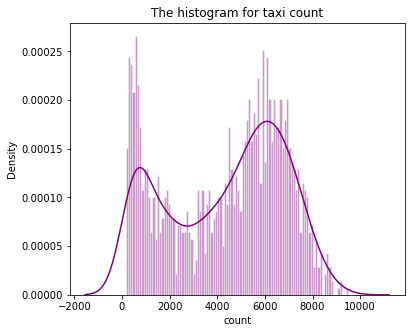

In [24]:
# Frist, it will plot the histogram for count
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(6,5)
sns.set_style('darkgrid')
sns.distplot(merged_df['count'], bins = 100, color = 'purple')
ax.set(xlabel='count', title='The histogram for taxi count')

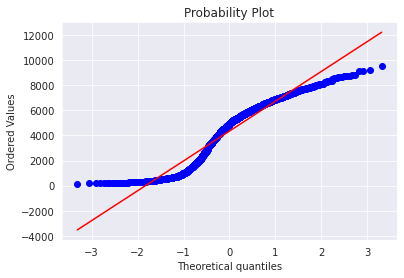

In [25]:
# And plot the Q-Q plot 
from scipy import stats
qq = stats.probplot(merged_df['count'], plot = sns.mpl.pyplot)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

<AxesSubplot:xlabel='uvindex', ylabel='Density'>

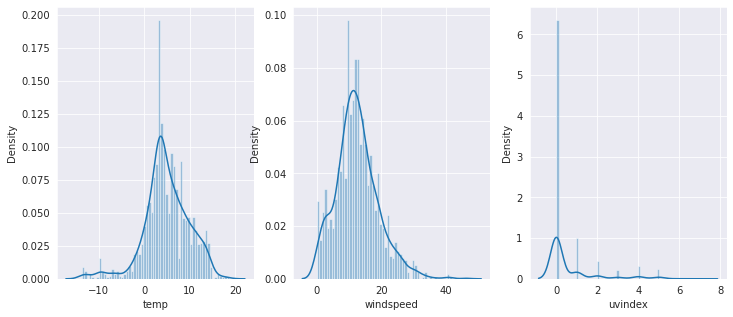

In [26]:
# Plotting histograms and box plots of characteristic variables to observe the distribution of values and outliers

## Histgram 
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12,5)
sns.distplot(merged_df['temp'], bins = 60, ax=axes[0])
sns.distplot(merged_df['windspeed'], bins = 60, ax=axes[1])
sns.distplot(merged_df['uvindex'], bins = 60, ax=axes[2])

<AxesSubplot:xlabel='weekday', ylabel='count'>

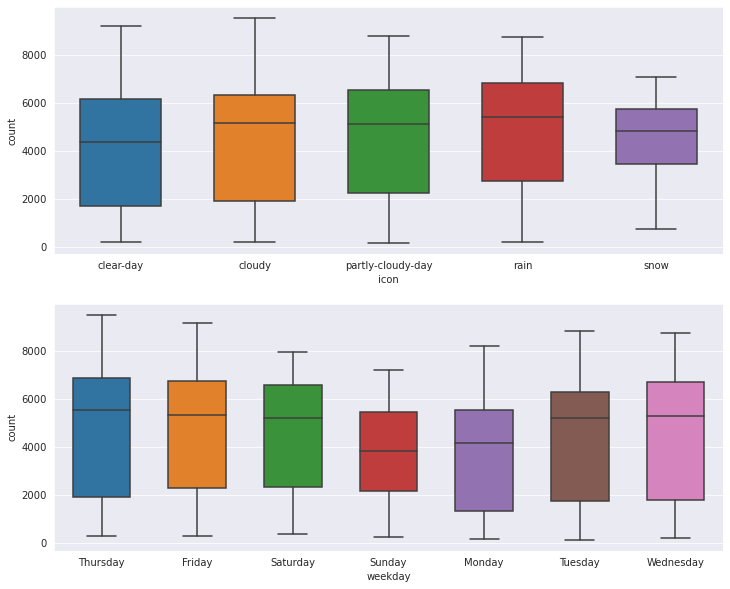

In [27]:
# Boxplot
fig, axes = plt.subplots(2,1)
fig.set_size_inches(12,10)
sns.boxplot(x='icon', y='count', data=merged_df, orient='v',width=0.6, ax=axes[0])
sns.boxplot(x='weekday', y='count', data=merged_df, orient='v',width=0.6, ax=axes[1])

通过对count绘制直方图和qq plot图可以发现，count的分布出现了双峰的情况，并不是正态分布。由于两个峰值之间的间隔不是很大，所以在之后的data transformation我们可以对count进行log转换使目标变量呈正态分布。    
通过对特征变量绘制直方图和箱型图可以发现，特征变量没有异常值的出现。从天气的角度来看，在snow的情况下，人们选择乘坐出租车的数量比较集中；在雨天的情况下，人们对出租车的平均需求量更大，而在晴天是人们对出租车的需求意愿最小。从一周的情况来看，人们在周日对出租车的平均需求量最小。

By plotting the histogram and QQ-plot for count, we can see that the distribution of count appears to be bimodal and not normally distributed. Since the interval between the two peaks is not very large, we can do the log transform to make the target variable normally distributed in the data transformation afterwards.      

And it shows that there are no outliers in the characteristic variables through plotting histograms and box plots. In terms of weather, the taxi count is more concentrated in the case of 'SNOW', the average demand for taxis is greater in the case of 'RAIN', and the taxi count is least in the case of 'CLEAR-DAY'. Looking at the week, people have the least average demand for taxis on 'SUNNDAY'.

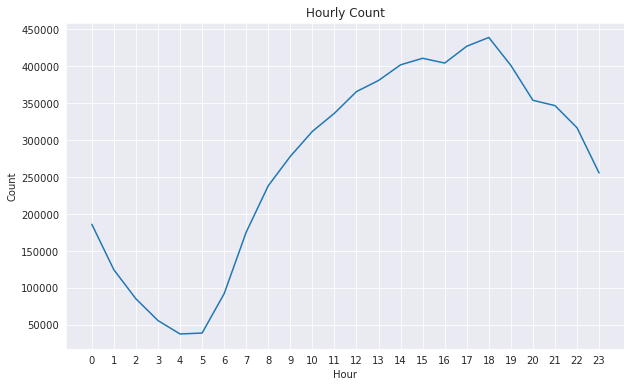

In [28]:
#每个小时的标识
hourly_count = merged_df.groupby('hour')['count'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_count.index, hourly_count.values)
ax.set_xticks(range(24))
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Hourly Count')
plt.show()

从一天出租车的需求量折线图可以发现，从早上5点开始需求量呈不断增加的趋势，在17-18h出现了需求量的最高峰值，从18h到凌晨需求量城逐渐下降的趋势。

The line graph of taxi demand for the day shows an increasing trend from 5am, with a peak in demand from 5pm-6pm and a gradual decline from 6pm to early morning.

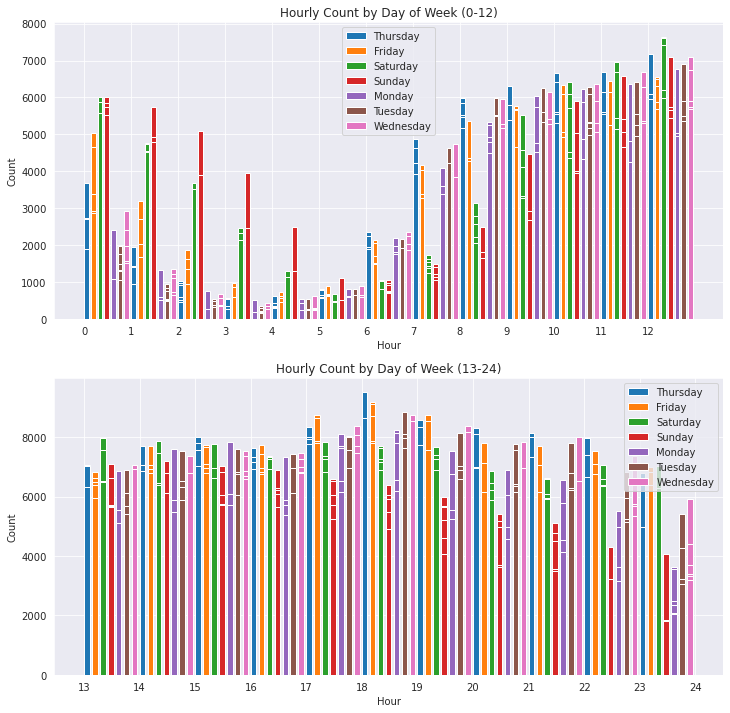

In [29]:
import matplotlib.pyplot as plt
plt.close('all')

# 将数据按照日期、小时和星期进行分组，并统计每组中的行数
grouped = merged_df.groupby(['date', 'hour', 'weekday'])['count'].sum().reset_index()

group1 = grouped[grouped['hour'] < 13]
group2 = grouped[grouped['hour'] >= 13]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

#第一个子图（0-12h）
for i, day in enumerate(group1['weekday'].unique()):
    x = group1[group1['weekday'] == day]['hour']
    y = group1[group1['weekday'] == day]['count']
    ax1.bar(x + i / 7, y, width=0.1, align='edge',  label=day)

ax1.set_xticks(range(13))
ax1.set_xlabel('Hour')
ax1.set_ylabel('Count')
ax1.set_title('Hourly Count by Day of Week (0-12)')
ax1.legend()

#第二个子图（13-24h）
for i, day in enumerate(group2['weekday'].unique()):
    x = group2[group2['weekday'] == day]['hour'] - 12
    y = group2[group2['weekday'] == day]['count']
    ax2.bar(x + i / 7 + 12, y, width=0.1,align='edge', label=day)

ax2.set_xticks(range(13, 25))
ax2.set_xlabel('Hour')
ax2.set_ylabel('Count')
ax2.set_title('Hourly Count by Day of Week (13-24)')
ax2.legend()

plt.show()

这张图提供了有关每日纽约出租车需求量更详细的信息。例如，在周六周日凌晨时段的乘车量非常高。与其他工作日相比，周五晚上的乘客量更接近非工作日晚上的乘客量，并且周日白天的乘客量明显的低于周一到周六的乘客量。此外，图中还显示了从整体上看，0-12小时的出租车的乘客量要较小于13-24小时。如果假设高乘车率与周末（包括周五晚上）和小班后的社交活动有关，那么周日是外出社交活动的低时段，人们更愿意选择在周五晚上和周六进行社交活动。

This chart provides more detailed information about the daily demand for New York taxis. For example, ridership is very high during the early morning hours on Saturday and Sunday. Friday night ridership is closer to non-working night ridership than other weekdays, and Sunday daytime ridership is significantly lower than Monday through Saturday ridership. In addition, the graph shows that overall, ridership for 0-12 hour taxis is smaller than for 13-24 hours. If it is assumed that high ridership is associated with socialising on weekends (including Friday evenings) and after working, then Sunday is a low time for socialising away from home and people prefer to socialise on Friday evenings and Saturdays.

通过以上分析，我们发现在一周内的变化主要体现在工作日和周末的区别。因此将数据进行处理，在之后分析weekday转换为工作日或者是周末对出租车需求的影响。

In [56]:
merged_df['weekday'] = merged_df['weekday'].replace({'Sunday': '7', 'Saturday': '6','Friday': '5','Thursday': '4','Wednesday': '3','Tuesday': '2','Monday': '1'})
merged_df['weekday'] = merged_df['weekday'].astype(int)


merged_df_weekday = merged_df.drop(columns = ['weekday'])



# 定义判断工作日或周末的函数
def is_weekday(date):
    day_of_week = date.weekday()
    if day_of_week < 5:
        return 'Weekday'
    else:
        return 'Weekend'

# 使用 apply() 方法调用自定义函数，并将结果存入 "day_type" 列中
merged_df_weekday['day_type'] = merged_df_weekday['date'].apply(is_weekday)

merged_df_weekday.head(100)

,datetime,count,date,hour,temp,windspeed,uvindex,icon,day_type
0,2022-12-01 00:00:00,2746,2022-12-01,0,5.2,24.8,0,clear-day,Weekday
1,2022-12-01 01:00:00,1261,2022-12-01,1,4.5,26.4,0,cloudy,Weekday
2,2022-12-01 02:00:00,670,2022-12-01,2,3.6,21.3,0,clear-day,Weekday
3,2022-12-01 03:00:00,427,2022-12-01,3,3.1,18.2,0,clear-day,Weekday
4,2022-12-01 04:00:00,388,2022-12-01,4,3.0,18.7,0,clear-day,Weekday
...,...,...,...,...,...,...,...,...,...
95,2022-12-04 23:00:00,2795,2022-12-04,23,4.2,9.5,0,clear-day,Weekend
96,2022-12-05 00:00:00,1519,2022-12-05,0,3.6,5.5,0,clear-day,Weekday
97,2022-12-05 01:00:00,654,2022-12-05,1,3.3,9.0,0,clear-day,Weekday
98,2022-12-05 02:00:00,405,2022-12-05,2,2.6,0.0,0,clear-day,Weekday


#### 4.2.2 Data transformation

**one-hot coding for 'icon' and 'weekday'**

In [91]:
encoded_df = pd.get_dummies(merged_df_weekday, columns=['icon','day_type'])
encoded_df.head(5)

,datetime,count,date,hour,temp,windspeed,uvindex,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,day_type_Weekday,day_type_Weekend
0,2022-12-01 00:00:00,2746,2022-12-01,0,5.2,24.8,0,1,0,0,0,0,1,0
1,2022-12-01 01:00:00,1261,2022-12-01,1,4.5,26.4,0,0,1,0,0,0,1,0
2,2022-12-01 02:00:00,670,2022-12-01,2,3.6,21.3,0,1,0,0,0,0,1,0
3,2022-12-01 03:00:00,427,2022-12-01,3,3.1,18.2,0,1,0,0,0,0,1,0
4,2022-12-01 04:00:00,388,2022-12-01,4,3.0,18.7,0,1,0,0,0,0,1,0


## 5.Methodology

相关性分析
发现变量之间有相关性
主成分分析 （如果没有较强的相关性的话就放弃，做案例中给的空间分析）

划分训练集和测试集
运用随机森林 lasso xboost 和多元回归进行模型拟合预测

## 5.1 Correlation Matrix

In [92]:
# Check the correlation
corrDf = encoded_df.corr()
corrDf

,count,hour,temp,windspeed,uvindex,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,day_type_Weekday,day_type_Weekend
count,1.000000,6.740079e-01,0.195135,0.105144,0.249781,-0.074490,0.002022,0.026659,0.067484,0.000341,4.962193e-02,-4.962193e-02
hour,0.674008,1.000000e+00,0.107155,0.075318,0.024804,-0.038795,-0.027688,0.025940,0.056883,0.018750,-3.609414e-18,1.871196e-17
temp,0.195135,1.071553e-01,1.000000,-0.280068,-0.005511,-0.261497,0.078635,0.034922,0.221655,-0.070010,1.582144e-01,-1.582144e-01
windspeed,0.105144,7.531770e-02,-0.280068,1.000000,0.040943,0.000768,-0.020527,-0.054176,0.084506,0.057578,-1.321316e-01,1.321316e-01
uvindex,0.249781,2.480427e-02,-0.005511,0.040943,1.000000,0.177530,-0.126442,0.071371,-0.155845,-0.024636,-1.615499e-02,1.615499e-02
icon_clear-day,-0.074490,-3.879506e-02,-0.261497,0.000768,0.177530,1.000000,-0.473202,-0.372349,-0.273266,-0.036213,-9.974978e-02,9.974978e-02
icon_cloudy,0.002022,-2.768848e-02,0.078635,-0.020527,-0.126442,-0.473202,1.000000,-0.362161,-0.265789,-0.035222,-1.223322e-02,1.223322e-02
icon_partly-cloudy-day,0.026659,2.593991e-02,0.034922,-0.054176,0.071371,-0.372349,-0.362161,1.000000,-0.209142,-0.027715,5.276778e-02,-5.276778e-02
icon_rain,0.067484,5.688298e-02,0.221655,0.084506,-0.155845,-0.273266,-0.265789,-0.209142,1.000000,-0.020340,8.929223e-02,-8.929223e-02
icon_snow,0.000341,1.875037e-02,-0.070010,0.057578,-0.024636,-0.036213,-0.035222,-0.027715,-0.020340,1.000000,4.612012e-03,-4.612012e-03


In [93]:
# Compare the correlation score
corrDf['count'].sort_values(ascending=False)

count                     1.000000
hour                      0.674008
uvindex                   0.249781
temp                      0.195135
windspeed                 0.105144
icon_rain                 0.067484
day_type_Weekday          0.049622
icon_partly-cloudy-day    0.026659
icon_cloudy               0.002022
icon_snow                 0.000341
day_type_Weekend         -0.049622
icon_clear-day           -0.074490
Name: count, dtype: float64

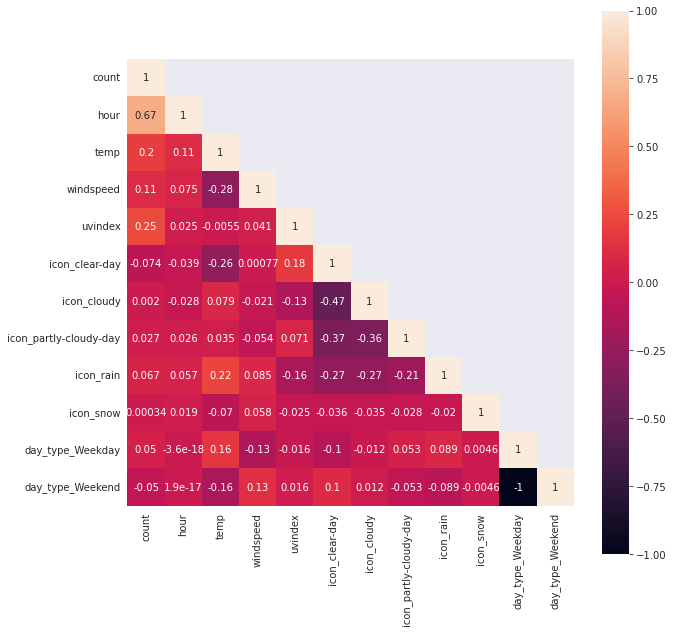

In [94]:
#plot the heatmap of correlation
corrDf
mask = np.array(corrDf)
mask[np.tril_indices_from(mask)]=False
fig = plt.figure(figsize=(10,10))
ax=sns.heatmap(corrDf,mask=mask,annot=True,square=True)

通过相关性矩阵发现存在自变量之间存在强相关性，例如'cloudy_day' and 'clear_day'.这将导致模型不稳定等问题，从而降低模型的预测能力。为了解决这个问题，我们使用主成分分析（PCA）进行降维。PCA通过线性组合原始变量，将它们转换为新的一组不相关的变量，称为主成分。这些主成分具有更少的相关性，从而可以更好地解释原始数据的变化。
Strong correlations between independent variables such as 'cloudy_day' and 'clear_day' were found to exist through the correlation matrix. This will lead to problems such as model instability, which will reduce the predictive power of the model. To solve this problem, we perform dimensionality reduction using principal component analysis (PCA). PCA converts the original variables into a new set of uncorrelated variables, called principal components, by linearly combining them. These principal components have less correlation and thus can better explain the variation in the original data.

In [95]:
encoded_df

,datetime,count,date,hour,temp,windspeed,uvindex,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,day_type_Weekday,day_type_Weekend
0,2022-12-01 00:00:00,2746,2022-12-01,0,5.2,24.8,0,1,0,0,0,0,1,0
1,2022-12-01 01:00:00,1261,2022-12-01,1,4.5,26.4,0,0,1,0,0,0,1,0
2,2022-12-01 02:00:00,670,2022-12-01,2,3.6,21.3,0,1,0,0,0,0,1,0
3,2022-12-01 03:00:00,427,2022-12-01,3,3.1,18.2,0,1,0,0,0,0,1,0
4,2022-12-01 04:00:00,388,2022-12-01,4,3.0,18.7,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,2023-01-31 19:00:00,6586,2023-01-31,19,3.3,0.4,0,0,1,0,0,0,1,0
1484,2023-01-31 20:00:00,6163,2023-01-31,20,3.3,11.1,0,0,1,0,0,0,1,0
1485,2023-01-31 21:00:00,6223,2023-01-31,21,2.8,16.2,0,0,1,0,0,0,1,0
1486,2023-01-31 22:00:00,5127,2023-01-31,22,2.1,18.0,0,0,1,0,0,0,1,0


In [97]:
# firstly we standardize the independent variables. This is essential for PCA.

from sklearn.preprocessing import StandardScaler

X = encoded_df.drop(columns=['datetime','date','count'])
list_var_X = X.columns.tolist()
X = StandardScaler().fit_transform(X)

In [110]:
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [99]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X ) # the list_var_X is used as the column names
df_PrincipleComp

,hour,temp,windspeed,uvindex,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,day_type_Weekday,day_type_Weekend
0,-3.099849e-02,-3.088551e-01,1.998913e-01,8.682489e-02,0.275594,-0.058123,-0.103854,-0.177156,0.019384,-0.605919,0.605919
1,-5.223889e-02,-2.570272e-01,1.004529e-02,3.287017e-01,0.576107,-0.562417,0.103138,-0.155588,0.018709,0.264249,-0.264249
2,2.306623e-01,2.250074e-01,-5.608783e-03,1.000097e-01,-0.285097,-0.474331,0.676780,0.220242,-0.035188,-0.189852,0.189852
3,1.951330e-01,4.708758e-02,3.046945e-01,-2.233429e-01,0.141625,-0.297408,-0.426990,0.719852,0.089127,-0.003478,0.003478
4,5.658742e-02,-4.762613e-01,5.987683e-01,-1.061112e-01,-0.282678,0.089853,0.237310,-0.091948,0.454545,0.142878,-0.142878
5,7.632113e-01,1.849187e-01,1.925751e-01,4.956682e-01,0.036325,0.219014,-0.157390,-0.152704,-0.029848,0.033717,-0.033717
6,1.251112e-01,1.989066e-01,-4.116779e-01,-7.372055e-02,0.102926,-0.069413,-0.069713,-0.092407,0.855589,-0.067177,0.067177
7,-5.243312e-01,2.109109e-01,1.764904e-01,7.012546e-01,-0.180844,0.071955,-0.105129,0.247359,0.214126,-0.029291,0.029291
8,-1.695835e-01,6.638019e-01,5.204192e-01,-2.653176e-01,0.251577,-0.061541,0.060897,-0.342725,0.031898,0.007550,-0.007550
9,1.709421e-16,2.729377e-16,-1.988686e-16,-4.704402e-17,0.549233,0.543811,0.486280,0.397560,0.060607,0.047000,0.047000


In [103]:
# install this library 
import sys
if 'bioinfokit' not in sys.modules:
    !pip3 install bioinfokit

In [105]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=X_new_components, loadings=pca.components_, 
               labels=df_PrincipleComp.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2))

![6](biplot_2d.png)

按照自己的图解释。。。。In this plot, the x and y axis represents the first and second PC, respectively. Each original dimension is repsented by the end point of the line, and the x and y coordinates of each line represent the weights of this dimension for the first and second PC, respetively. 

For example, the weight of **INDUS** for the PC1 is 0.3549, and the variables of ZN, DIS, and RM have negative weights for PC1.

In [106]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[2.00522851e-01 1.45263943e-01 1.22354768e-01 1.17342140e-01
 1.05944447e-01 9.39836587e-02 8.75560399e-02 7.81362605e-02
 4.88958915e-02 7.26190019e-33 2.32461743e-33]


In [107]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[2.20723472e+00 1.59897796e+00 1.34680756e+00 1.29163157e+00
 1.16617264e+00 1.03451548e+00 9.63764130e-01 8.60076875e-01
 5.38216511e-01 7.99346216e-32 2.55879880e-32]


Text(0, 0.5, 'PC2')

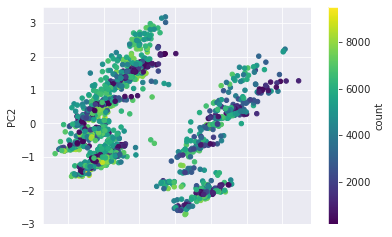

In [112]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the count column from encoded_df to df_X_new_coord
df_X_new_coord['count'] = encoded_df['count']
ax = df_X_new_coord.plot.scatter(x=0, y=1, c='count', colormap='viridis')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [113]:
# create a new X dataset including three PCs
X_three_pc = X_new_components[:,[0,1,2,3,4,5]]

**Log Transformation**

In this project, the target Variable is set to the ‘count’ number. The variable needs to be checked whether there is the outliers or not.And then the logarithmic transformation processing is performed.

In [59]:
# The outlier for the target variable is out - Remove values other than 3 times the variance
data_std = train_df[np.abs(train_df['count'] - train_df['count'].mean())<=(3*train_df['count'].std())]
data_std.shape

(1116, 9)

The variable is checked. and there is not the outlier.

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

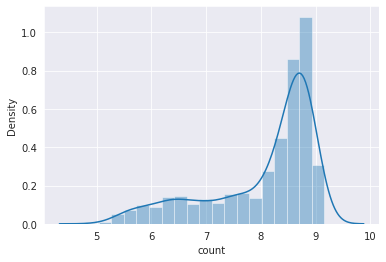

In [60]:
# log transfromation
ylabels = data_std['count']
ylabels_log = np.log(ylabels)
sns.distplot(ylabels_log)

In [61]:
data_std['count_log'] = ylabels_log
data_std = data_std.drop(['count'], axis=1)
data_std

,datetime,date,hour,temp,windspeed,uvindex,icon,day_type,count_log
552,2022-12-24 00:00:00,2022-12-24,0,-12.8,15.1,0,partly-cloudy-day,Weekend,7.664347
54,2022-12-03 06:00:00,2022-12-03,6,11.4,13.0,0,cloudy,Weekend,6.904751
1048,2023-01-13 16:00:00,2023-01-13,16,7.2,22.0,0,partly-cloudy-day,Weekday,8.828641
164,2022-12-07 20:00:00,2022-12-07,20,13.5,8.4,0,cloudy,Weekday,8.955835
774,2023-01-02 06:00:00,2023-01-02,6,10.0,8.5,0,partly-cloudy-day,Weekday,6.683361
...,...,...,...,...,...,...,...,...,...
802,2023-01-03 10:00:00,2023-01-03,10,9.6,3.0,0,cloudy,Weekday,8.581482
53,2022-12-03 05:00:00,2022-12-03,5,10.7,12.6,0,cloudy,Weekend,6.242223
350,2022-12-15 14:00:00,2022-12-15,14,4.4,18.6,0,cloudy,Weekday,8.951311
79,2022-12-04 07:00:00,2022-12-04,7,4.0,14.8,0,clear-day,Weekend,7.292337


In [121]:
# split the traing and testing dataset
y=encoded_df.loc[:,['count']]
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, test_size=0.25,random_state=split_rand_state)

In [119]:
# train a new model
from sklearn.linear_model import LinearRegression
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression()

In [120]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.5342944892110113

首先对原始dataframe划分训练集和测试集，然后对训练集进行log转换以提升模型的准确性。    
The original dataframe is first divided into a training set and a test set, and then the training set is log transformed to improve the accuracy of the model.

In [57]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(merged_df_weekday.drop(['count'], axis=1), merged_df_weekday['count'], test_size=0.25,random_state=random_state_split)

In [58]:
# the train and test data

train_df = pd.concat([train_x, train_y], axis = 1)
test_df = pd.concat([test_x, test_y], axis = 1)

# check the shape of training data and testing data
row_train = train_df.shape[0]
row_test = test_df.shape[0]
print('The training dataset has:',row_train,'; The testing dataset has:', row_test)

The training dataset has: 1116 ; The testing dataset has: 372


## 6.results and discusion

## 7.conclusion